# Introduction:

**Problem Statement:**

Suppose you are a data scientist working for a bank that recently conducted a marketing campaign to promote term deposits to its clients. The bank collected data on various client characteristics, such as age, job type, marital status, education level, and more. Your task is to analyze this dataset and build a machine learning model to predict whether a client will subscribe to a term deposit or not.

<center><img src="https://img.etimg.com/thumb/width-420,height-315,imgsize-51456,resizemode-75,msid-110798763/markets/stocks/news/will-short-term-narrative-headwinds-for-psu-banks-bring-back-mojo-to-private-sector-banks-5-banks-with-an-upside-potential-of-up-to-24/bankk.jpg"/></center>

By accurately predicting client subscription behavior, your model will enable the bank to optimize its marketing efforts. It will help identify potential clients who are more likely to subscribe to the term deposit, allowing the bank to focus its resources on targeting these individuals. This targeted approach will not only increase the effectiveness of the marketing campaign but also maximize the bank's return on investment.

# STEP 1: Import the necessary Libraries

In [8]:
# Import the necessary libraries
# Data manipulation and numerical operationsimport pandas as pd
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning model metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Setting maximum limit of the number of columns visible
pd.set_option('display.max_columns', 30)

# STEP 2: Loading the Data

**Dataset Information:**
Content: Each row represents a customer, and each column contains attributes related to the customer's socio-economic background, bank contact information, and the outcome of a marketing campaign.

The dataset includes information about:

- **Demographic Information:** Age, job type, marital status, education level, whether the customer has a loan or housing loan, and whether they have defaulted on a loan.

- **Bank Contact Information:** The method of contact (cellular, telephone), last contact month, last contact day of the week, duration of the last contact, and number of contacts performed during this campaign.

- **Socio-Economic Indicators:** Employment variation rate, consumer price index, consumer confidence index, Euribor 3-month rate, and the number of employees.

- **Campaign Outcome:** Whether the client has subscribed to a term deposit (the column is called y).

### 2.1 Load the data & view it

*Hint: Use `;` as the delimiter.*

In [9]:
# Loading the data
# Read the csv file
data = pd.read_csv("../resources/bank_data.csv", delimiter=';')

# Viewing the data
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 2.2 View the columns of the data and understand them

In [10]:
# View the columns of the dataset
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### 2.3 Check the shape of the dataset

In [11]:
# Checking the shape of the data
data.shape

(41188, 21)

### 2.4 Understand the datatypes of each of the columns

In [12]:
# Check the dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Observation:**
There are no null values in the dataset.

# STEP 3: EDA

### 3.1 Check the distribution of the target variable - `y`.

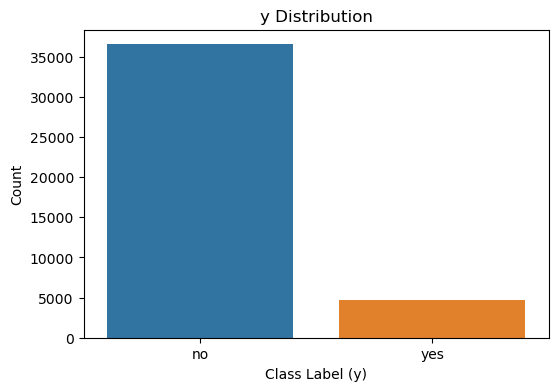

In [13]:
# Checking the distribution of the target variable 'y'

# Set the figure size for better readability
plt.figure(figsize=(6, 4))

# Create a count plot for the 'y' variable in the dataset
sns.countplot(x='y', data=data)

# Add a title to the plot
plt.title("y Distribution")

# Label the x-axis
plt.xlabel("Class Label (y)")

# Label the y-axis
plt.ylabel("Count")

# Display the plot
plt.show()


### Interpretation:
- The dataset suffers from class imbalance.

### 3.2 Do an analysis of the `Subscription Rate` variable wrt all the categorical variables

*Hint: Use normalized values to plot to avoid the class imbalance problem.*

In [14]:
# Listing all the categorical columns
categorical_columns = [
    'job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'
]

In [15]:
data.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


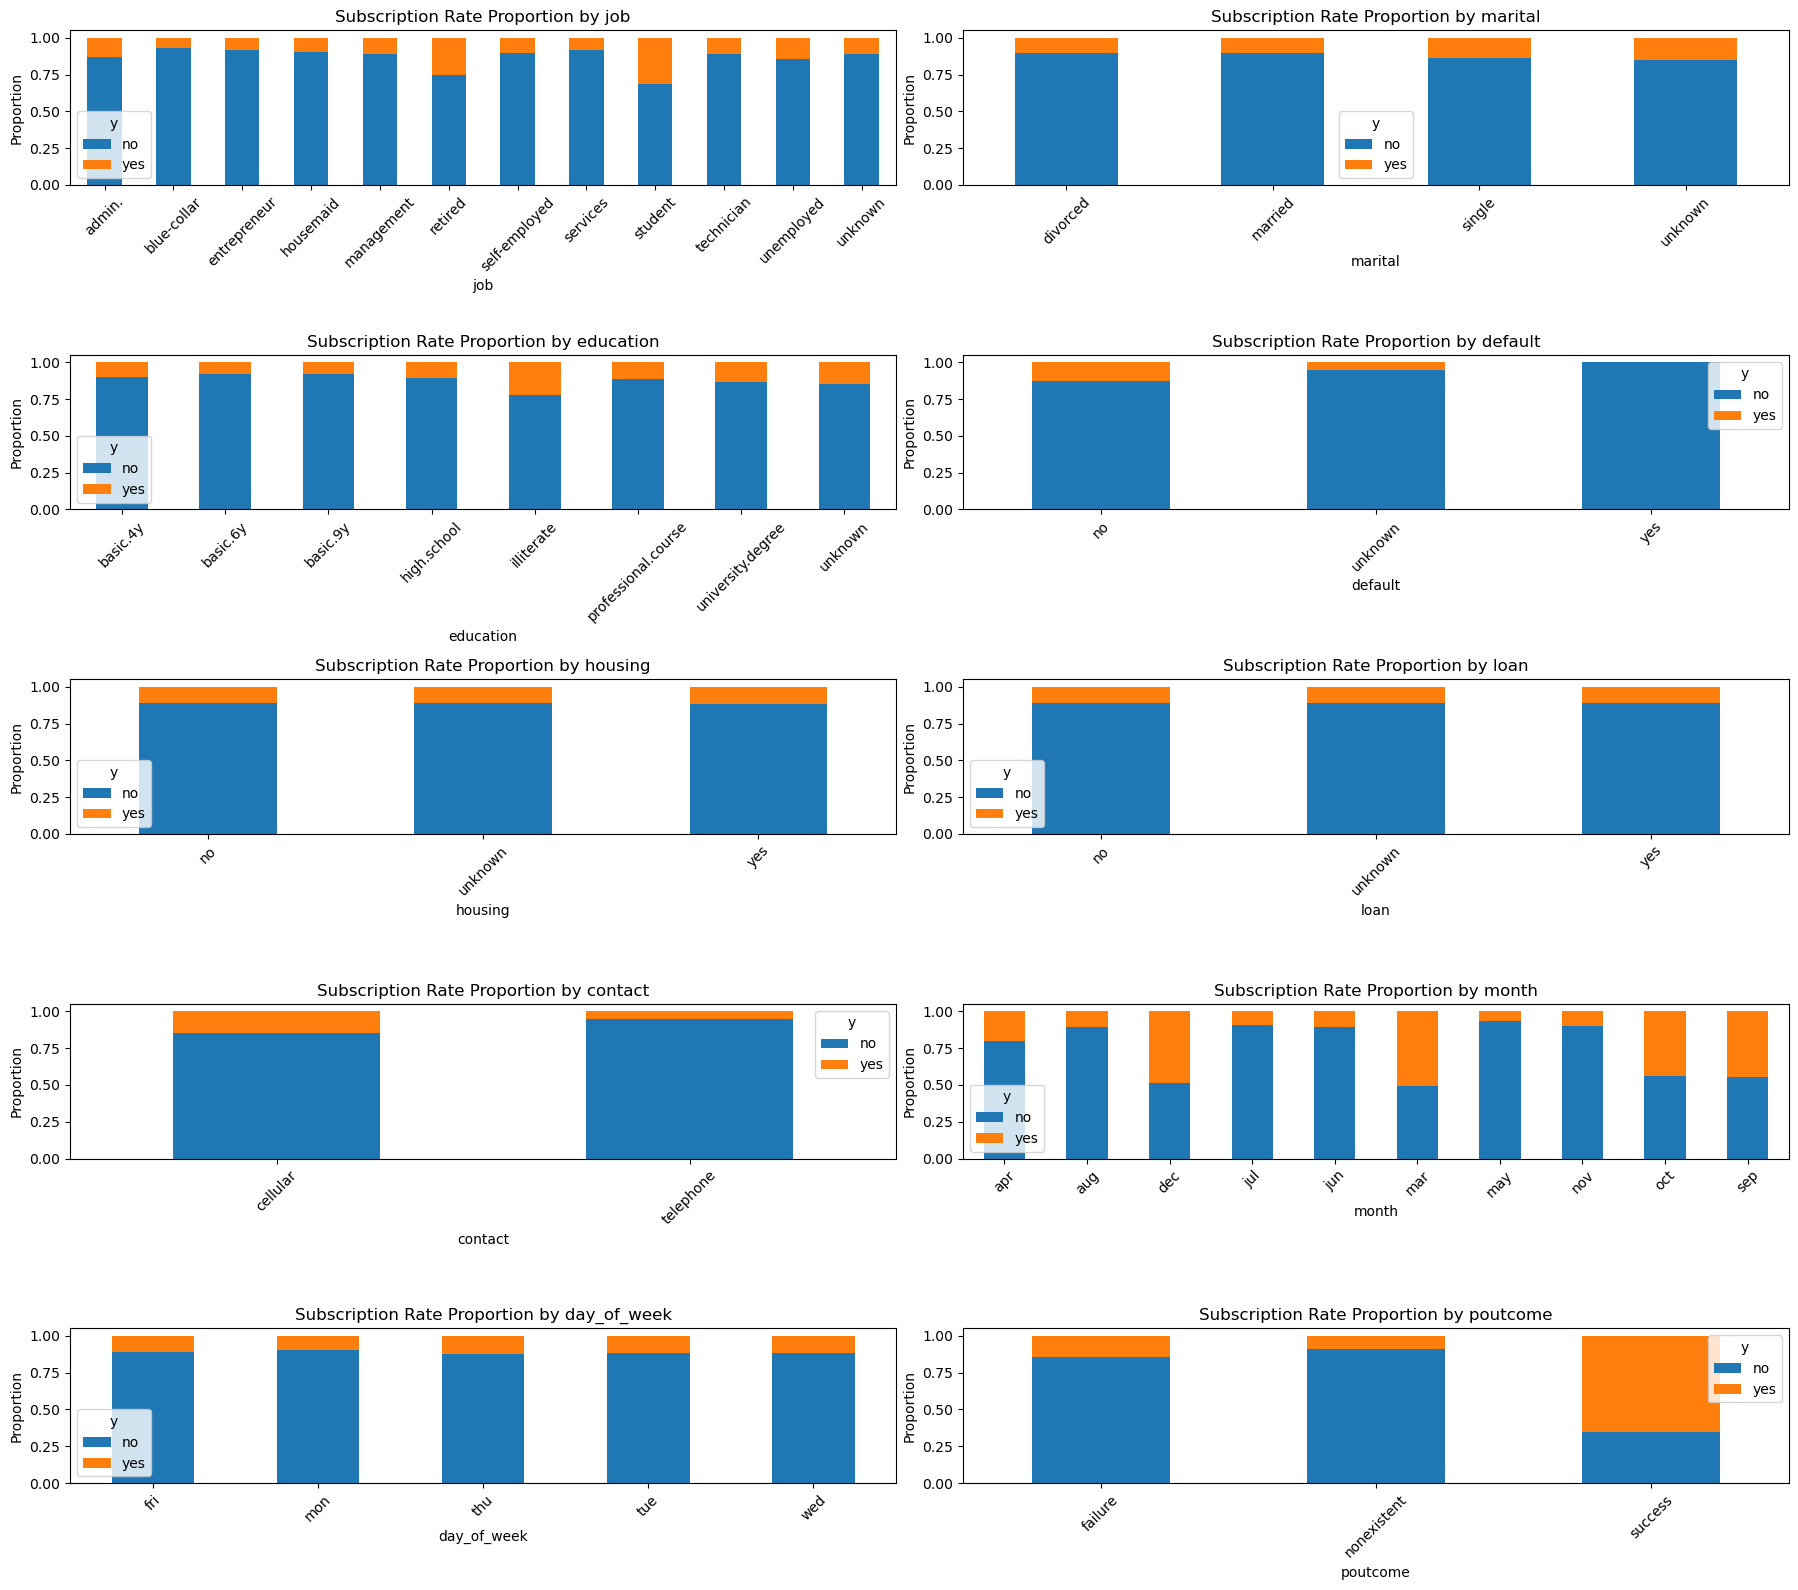

In [16]:
# Visualize the data
# Setting up the subplot grid
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 16))
axes = axes.flatten()

# Plotting each categorical feature in a subplot
for i, column in enumerate(categorical_columns):
    # Calculating normalized proportions because of class imbalance
    normalized_counts = (
        data.groupby(column)['y']
        .value_counts(normalize=True)
        .unstack()
    )

    # Plotting the normalized counts as bar plots
    normalized_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=axes[i])

    # Setting title and labels
    axes[i].set_title(f"Subscription Rate Proportion by {column}")
    axes[i].set_ylabel('Proportion')
    axes[i].set_xlabel(column)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability

# Adjusting layout
plt.tight_layout()
plt.show()

### Interpretation:
Here’s an enhanced interpretation that includes any previously missed important points:

- Subscription rates are relatively higher in job categories like "student" and "retired," indicating that these groups are more receptive to the marketing campaign.

- Married customers have a slightly lower subscription rate compared to single and divorced customers, suggesting that marital status might influence decision-making.

- Customers with higher education levels, such as those with a "university degree" or "professional course," show a slightly higher subscription rate, indicating that education level may play a role in subscription likelihood.

- Customers who have not defaulted on a loan are more likely to subscribe than those who have defaulted or whose default status is unknown, highlighting the importance of financial reliability.

- The presence of a housing loan does not significantly impact the subscription rate, indicating that this factor may not be crucial in influencing decisions.

- Similarly, having a personal loan also does not show a clear impact on subscription rates.

- Customers contacted via cellular have a higher subscription rate compared to those contacted via telephone, possibly due to the convenience and immediacy of mobile communication.

- Subscription rates are higher for customers contacted in months like March, September, October, and December, while months like May and July show lower subscription rates, indicating seasonal or campaign timing effects.

- Customers contacted on different days of the week show relatively consistent subscription rates, suggesting that the day of contact does not significantly influence the outcome.

- Customers whose previous campaign outcome was a success are significantly more likely to subscribe, indicating the importance of past positive experiences in influencing future decisions.


# STEP 4: Feature Engineering

### 4.1 Do a correlation analysis of the data

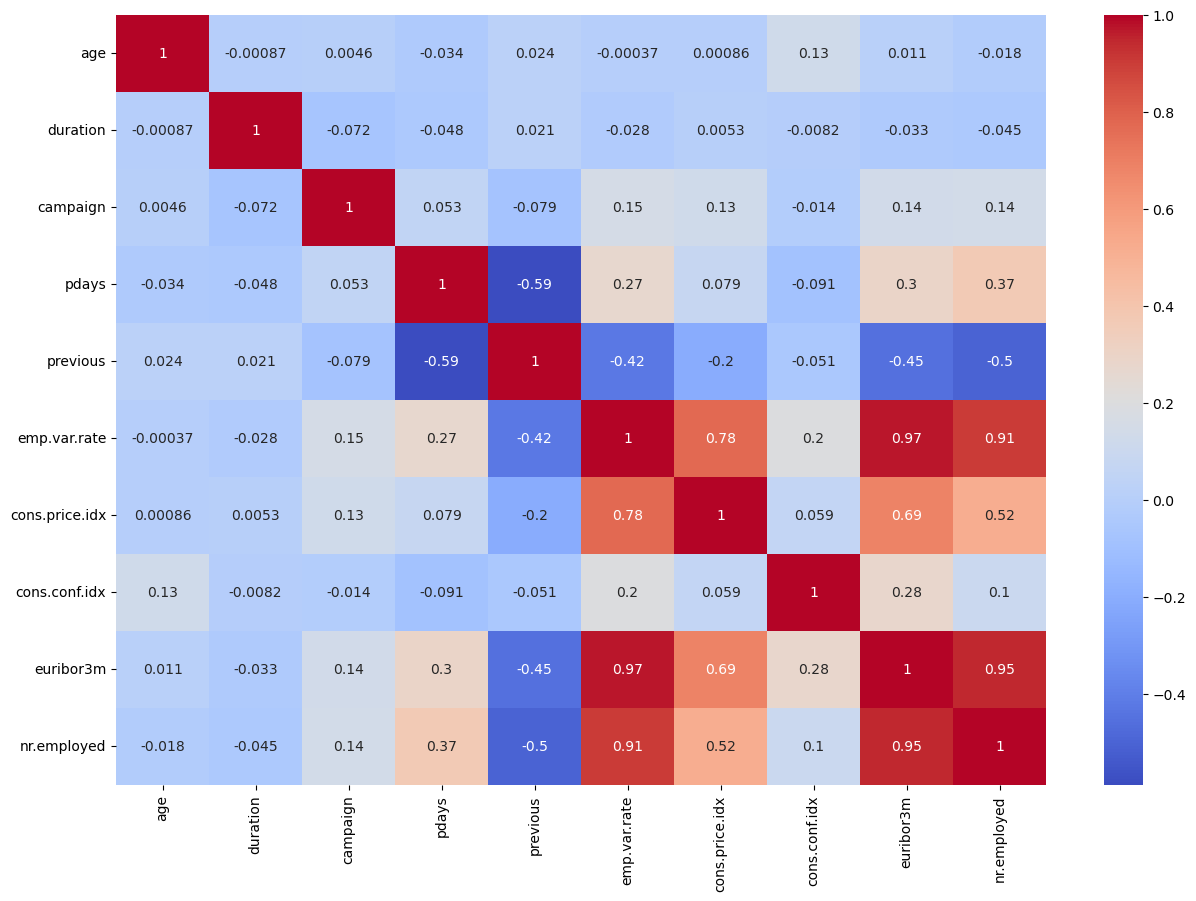

In [17]:
#Correlation analysis of the dataset
# Set the figure size to make the heatmap more readable
plt.figure(figsize=(15, 10))

# Create a heatmap to visualize the correlation matrix of the numeric features in the dataset
# The 'annot=True' parameter adds the correlation values directly on the heatmap
# 'cmap='coolwarm'' applies a color map to distinguish positive and negative correlations clearly
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()

### Interpretation:


- **Strong Positive Correlations**:
  - `emp.var.rate` is highly positively correlated with `euribor3m` and `nr.employed` (both > 0.9), indicating that these economic indicators move closely together.
  - `cons.price.idx` also shows a moderate positive correlation with `emp.var.rate` and `euribor3m`.

- **Negative Correlations**:
  - `pdays` has a strong negative correlation with `previous`, suggesting that the more days that have passed since the last contact, the fewer previous contacts there were.
  - `pdays` also shows negative correlations with `nr.employed` and `emp.var.rate`, indicating inverse relationships between these variables.

- **Weak or No Correlation**:
  - Variables like `age`, `duration`, and `campaign` exhibit very weak correlations with most other variables, suggesting they are relatively independent of the economic indicators.


### 4.2 Plot a heat map for the top 3 highly correlated variables

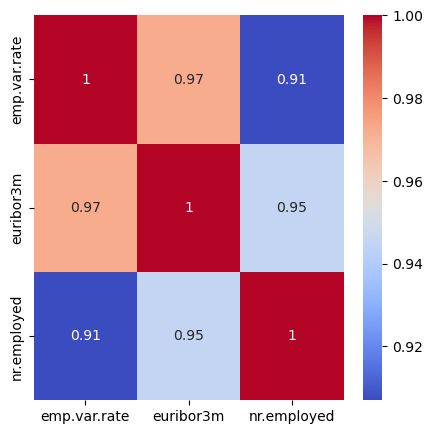

In [18]:
#Heat map for the top 3 correlated variables
plt.figure(figsize=(5,5))
sns.heatmap(data[['emp.var.rate','euribor3m', 'nr.employed']].corr(numeric_only=True),annot=True, cmap='coolwarm')
plt.show()

# Interpretation:

- The strong correlations among `euribor3m`, `emp.var.rate`, and `nr.employed` suggest that these variables may carry similar information.

# STEP 5: Feature Engineering

### 5.1 Create a new feature `pdays999`

Create a new binary feature `pdays999` that indicates whether the pdays value is 999.

In the context of marketing data, `pdays=999` often represents customers who were not previously contacted. This feature might be more informative than the raw pdays values.

In [19]:
# Create a binary feature indicating if 'pdays' equals 999, which likely represents customers not previously contacted
data['pdays999'] = (data['pdays'] == 999)

# View the new feature created
data['pdays999'][:5]

0    True
1    True
2    True
3    True
4    True
Name: pdays999, dtype: bool

## 5.2 Drop the original `pdays`column, `euribor3m`, `nr.employed` columns

In [20]:
# Dropping the original 'pdays' column since it's now represented by 'pdays999'
# Dropping 'euribor3m', 'nr.employed' due to its high multicollinearity with  'emp.var.rate'
data = data.drop(['pdays', 'euribor3m','nr.employed'], axis=1)

# Display the first few rows of the updated dataframe to verify changes
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y,pdays999
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,no,True
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,no,True
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,no,True
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,no,True
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,no,True


### 5.3 Add the `pdays999` column to the list of categorical columns already created

In [21]:
# Append the column `pdays999` to the categorical columns list created already
categorical_columns.append('pdays999')

# Check the list
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'pdays999']

### 5.4 Convert the categorical features to dummies and prepare for modelling

In [22]:
# Create dummies for categorical variables
data = pd.get_dummies(data=data, columns=categorical_columns, drop_first=True)

# Check the data
data.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,pdays999_True
0,56,261,1,0,1.1,93.994,-36.4,no,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True
1,57,149,1,0,1.1,93.994,-36.4,no,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True
2,37,226,1,0,1.1,93.994,-36.4,no,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True
3,40,151,1,0,1.1,93.994,-36.4,no,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True
4,56,307,1,0,1.1,93.994,-36.4,no,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True


### 5.5 Check for null values after the dummies creation & handle them if required

In [23]:
# Checking for null values
data.isna().sum()

age                              0
duration                         0
campaign                         0
previous                         0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
y                                0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university.degree      0
education_unknown   

### Interpretation:

- There are no null values in the dataset.

# STEP 6: Model Building

### 6.1 Split the data into train and test

In [24]:
# Separate the features (X) from the target variable (y)
X = data.drop('y', axis=1)  # Drop the target variable 'y' from the dataset to create the feature set X
y = data['y']  # Assign the target variable 'y' to the variable y

# Splitting the dataset into training and testing sets
# 'test_size=0.25' means 25% of the data will be used for testing, and 75% for training
# 'random_state=100' ensures that the split is reproducible (same data split every time you run the code)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

# Check the data
X_train[:5]

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,pdays999_True
36425,30,224,1,0,-2.9,92.963,-40.8,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False,True,False,True,False,True
25421,37,372,1,1,-0.1,93.200,-42.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
1410,38,205,2,0,1.1,93.994,-36.4,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True
1934,33,389,2,0,1.1,93.994,-36.4,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True
25264,46,354,2,1,-0.1,93.200,-42.0,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True


### 6.2 Build a Naive Bayes Classifier on the data


In [25]:
# Import the module
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on the test set
y_pred = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8723
Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.93      0.93      9149
         yes       0.43      0.45      0.44      1148

    accuracy                           0.87     10297
   macro avg       0.68      0.69      0.68     10297
weighted avg       0.87      0.87      0.87     10297



### Interpretation:

- **Overall Accuracy**: The model achieved an accuracy of 87.23%, indicating that it correctly predicted the target variable for approximately 87% of the cases.
- **Class Imbalance Impact**:
  - **Class "no"**: High precision (93%) and recall (93%) indicate that the model is very effective at correctly identifying cases where the outcome is "no".
  - **Class "yes"**: The model struggles with predicting the minority class "yes", with a lower precision (43%) and recall (45%), showing difficulty in correctly identifying and capturing these cases.
- **Macro Average**: The macro average metrics (precision, recall, f1-score) are lower (around 68-69%) due to the model's poorer performance on the minority class "yes".
- **Weighted Average**: The weighted averages are similar to the overall accuracy, reflecting that the model is heavily influenced by the majority class "no".


### 6.3 Build a Decision Tree Classifier with 'gini' as the criterion for split


In [26]:
# Import the library
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier with 'gini' as the criterion
dt = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the classifier on the training data
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8857
Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.93      0.94      9149
         yes       0.49      0.51      0.50      1148

    accuracy                           0.89     10297
   macro avg       0.71      0.72      0.72     10297
weighted avg       0.89      0.89      0.89     10297



### Interpretation:

- **Overall Accuracy**: The model achieved an accuracy of 88.57%, meaning it correctly predicted the target variable for approximately 89% of the cases.

- **Performance on "no" Class**:
  - **Precision (94%)**: The model is highly accurate in predicting the "no" class when it actually is "no".
  - **Recall (93%)**: The model correctly identifies 93% of the actual "no" instances.

- **Performance on "yes" Class**:
  - **Precision (49%)**: The model is less accurate when predicting the "yes" class, with almost half of the positive predictions being incorrect.
  - **Recall (51%)**: The model correctly identifies 51% of the actual "yes" instances, meaning it misses nearly half of the "yes" cases.

- **Macro Average**: The macro average precision, recall, and f1-score are around 71-72%, reflecting the model’s varying performance between the "no" and "yes" classes.

- **Weighted Average**: The weighted averages closely align with the overall accuracy, indicating that the model's performance is more influenced by the majority "no" class.


### 6.4 Build a Decision Tree Classifier with 'entropy' as the criterion for split




In [27]:
# Initialize the Decision Tree classifier with 'entropy' as the criterion
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the classifier on the training data
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8906
Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.94      0.94      9149
         yes       0.51      0.51      0.51      1148

    accuracy                           0.89     10297
   macro avg       0.72      0.73      0.72     10297
weighted avg       0.89      0.89      0.89     10297



### Interpretation:

- **Overall Accuracy**: The model achieved an accuracy of 89.06%, meaning it correctly predicted the target variable in approximately 89% of the cases.

- **Performance on "no" Class**:
  - **Precision (94%)**: The model is very accurate in predicting the "no" class, with 94% of the "no" predictions being correct.
  - **Recall (94%)**: The model correctly identifies 94% of the actual "no" instances.

- **Performance on "yes" Class**:
  - **Precision (51%)**: The model correctly predicts the "yes" class only 51% of the time, meaning nearly half of the "yes" predictions are incorrect.
  - **Recall (51%)**: The model correctly identifies 51% of the actual "yes" instances, indicating moderate performance in detecting the minority class.

- **Macro Average**: The macro average precision, recall, and f1-score are around 72-73%, reflecting the model’s ability to handle both classes, with slightly better performance on the "no" class.

- **Weighted Average**: The weighted averages are similar to the overall accuracy, indicating that the model's performance is heavily influenced by the dominant "no" class.
